In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

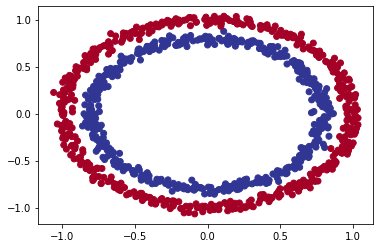

In [ ]:
#create data
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,noise = 0.03,random_state = 42)
plt.scatter(X[:,0],X[:,1],c = y,cmap=plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential(([
    tf.keras.layers.Dense(1)
]))
model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['accuracy'])
model1.fit(X,y,epochs = 5)


Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4820


In [ ]:
model1.fit(X,y,epochs = 200,verbose = 0)
model1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
model2 = tf.keras.Sequential(([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]))
model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model2.fit(X,y,epochs = 200,verbose = 0)
model2.evaluate(X,y)


32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4790


[0.6934832334518433, 0.4790000021457672]

In [ ]:
model3 = tf.keras.Sequential(([
    tf.keras.layers.Dense(100, input_shape = (None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]))
model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])
model3.fit(X,y,epochs = 100,verbose = 0)
model3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4995 - mae: 0.4995


[0.4995468258857727, 0.4995468258857727]

In [ ]:
def plot_decision_boundary(model,x,y):
  x_min, x_max = x[:,0].min() + 0.1, x[:,0].max() + 0.1
  y_min, y_max = x[:,1].min() + 0.1, x[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max),np.linspace(y_min,y_max))
  x_in = np.c_[xx.ravel(),yy.ravel()]
  y_pred = model.predict(x_in)
  if len(y_pred[0]) > 1:
    y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu,alpha = 0.7)
  plt.scatter(x[:,0],x[:,1],c = y, s = 40, cmap= plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

79/79 [==============================] - 0s 1ms/step


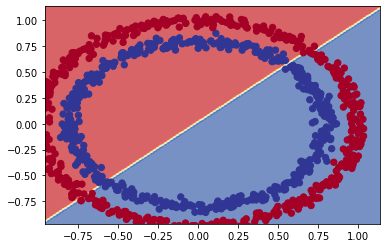

In [ ]:
plot_decision_boundary(model3,X,y)

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

x_reg_train, x_reg_test, y_reg_train, y_reg_test = X_regression[150:], X_regression[:150], y_regression[150:],y_regression[:150]
model3.fit(tf.expand_dims(x_reg_train,axis = -1),y_reg_train, epochs = 200)

Epoch 1/200
2/2 [==============================] - 0s 9ms/step - loss: 1111.4940 - mae: 1111.4939
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 867.8306 - mae: 867.8306
Epoch 3/200
2/2 [==============================] - 0s 5ms/step - loss: 542.9360 - mae: 542.9360
Epoch 4/200
2/2 [==============================] - 0s 5ms/step - loss: 169.4866 - mae: 169.4866
Epoch 5/200
2/2 [==============================] - 0s 5ms/step - loss: 265.9059 - mae: 265.9059
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 344.5757 - mae: 344.5757
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 214.5631 - mae: 214.5631
Epoch 8/200
2/2 [==============================] - 0s 5ms/step - loss: 94.6543 - mae: 94.6543
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 160.3252 - mae: 160.3252
Epoch 10/200
2/2 [==============================] - 0s 5ms/step - loss: 191.5390 - mae: 191.5390
Epoch 11/200
2/2 [=====================

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([tf.keras.layers.Dense(10,activation = tf.keras.activations.relu)])

model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history = model_4.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3182 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1668 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0028 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8309 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7624 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6922 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6285 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5517 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4625 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss:

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)])

model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history = model_5.fit(X,y,epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

79/79 [==============================] - 0s 1ms/step


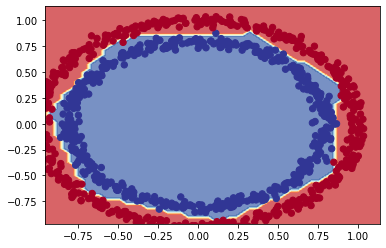

In [ ]:
plot_decision_boundary(model_5,X,y)

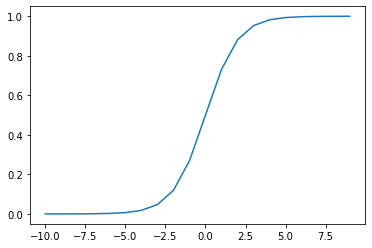

In [ ]:
A = tf.cast(tf.range(-10,10),dtype = tf.float32)
def sigmoid(x):
  return 1/(1+tf.math.exp(-x))
plt.plot(A,sigmoid(A))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_8.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr = 0.01),
               metrics = ['accuracy'])
history = model_8.fit(X_train,y_train, epochs = 25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 5ms/step - loss: 0.6893 - accuracy: 0.5238
Epoch 2/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6842 - accuracy: 0.5612
Epoch 3/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5587
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6620 - accuracy: 0.6275
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6417 - accuracy: 0.6963
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.7412
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7825
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7825
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.8562
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.9087
Epoch 11/25
25/25 [===========

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9800


[0.07888670265674591, 0.9800000190734863]

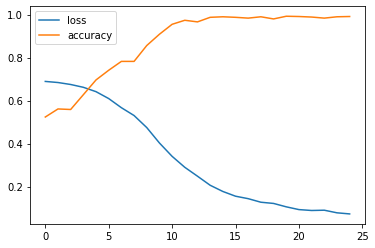

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
tf.random.set_seed(42)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_9.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr = 0.01),
               metrics = ['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history9 = model_9.fit(X_train,y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6871 - ac

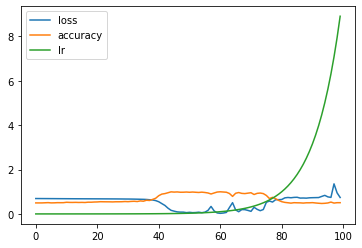

In [ ]:
pd.DataFrame(history9.history).plot()

Text(0, 0.5, 'y')

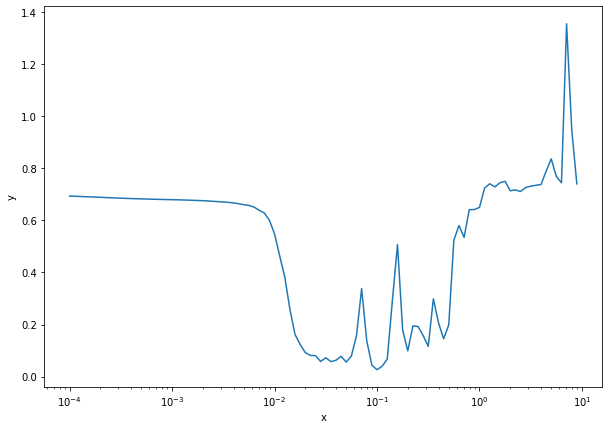

In [ ]:
lrs = 1e-4 *10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history9.history['loss'])
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
tf.random.set_seed(42)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_10.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(lr = 0.02),
               metrics = ['accuracy'])
history10 = model_10.fit(X_train,y_train, epochs = 20)

NameError: ignored

In [ ]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9800


[0.06876426935195923, 0.9800000190734863]

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'models accuracy:{accuracy}')
print(f'models loss:{loss}')

7/7 [==============================] - 0s 5ms/step - loss: 0.0688 - accuracy: 0.9800
models accuracy:0.9800000190734863
models loss:0.06876426935195923


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()
train_data2 = train_data/255
test_data2 = test_data/255

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'T-shirt/top')

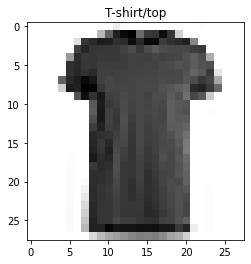

In [ ]:
index = 17
plt.imshow(train_data[index], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index]])

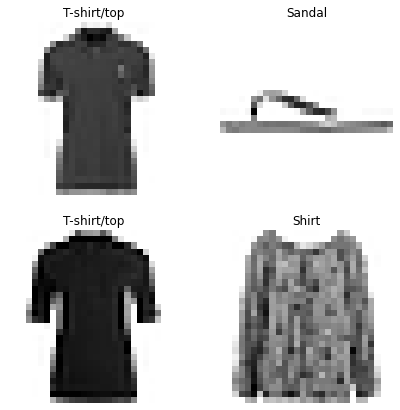

In [ ]:
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
tf.random.set_seed(42)
model_11_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model_11_a.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
norm_history = model_11_a.fit(train_data2, train_labels,epochs = 10, validation_data = (test_data2,test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
non_norm_history = model_12.fit(train_data, train_labels,epochs = 10, validation_data = (test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy:

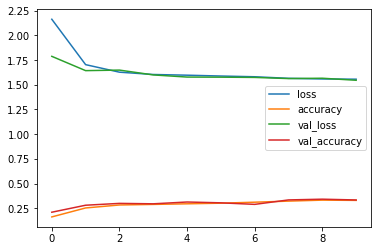

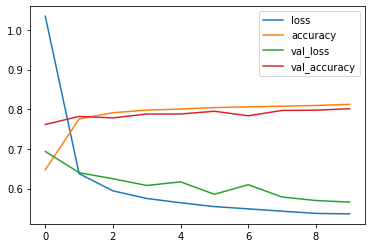

In [ ]:
pd.DataFrame(non_norm_history.history).plot()
pd.DataFrame(norm_history.history).plot()

In [ ]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(4,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10**(epoch/20))
norm_history = model_11.fit(train_data2, train_labels,epochs = 40, validation_data = (test_data2,test_labels),callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0, 0.5, 'loss')

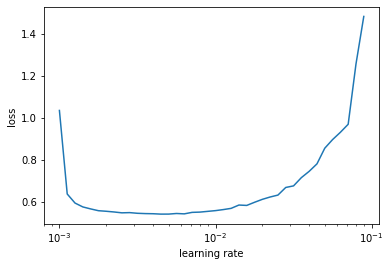

In [ ]:
lrs = 1e-3 *10**(tf.range(40)/20)
loss = norm_history.history['loss']
plt.semilogx(lrs,loss)
plt.xlabel('learning rate')
plt.ylabel('loss')

In [ ]:
y_probs = model_11_a.predict(test_data2)
y_preds = y_probs.argmax(axis = 1)
y_preds

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 3, 1, 5])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
score = 0
for i in range(10000):
  if y_preds[i] == test_labels[i]:
    score += 1
score/10000

0.8014

In [ ]:
len(y_preds)

10000

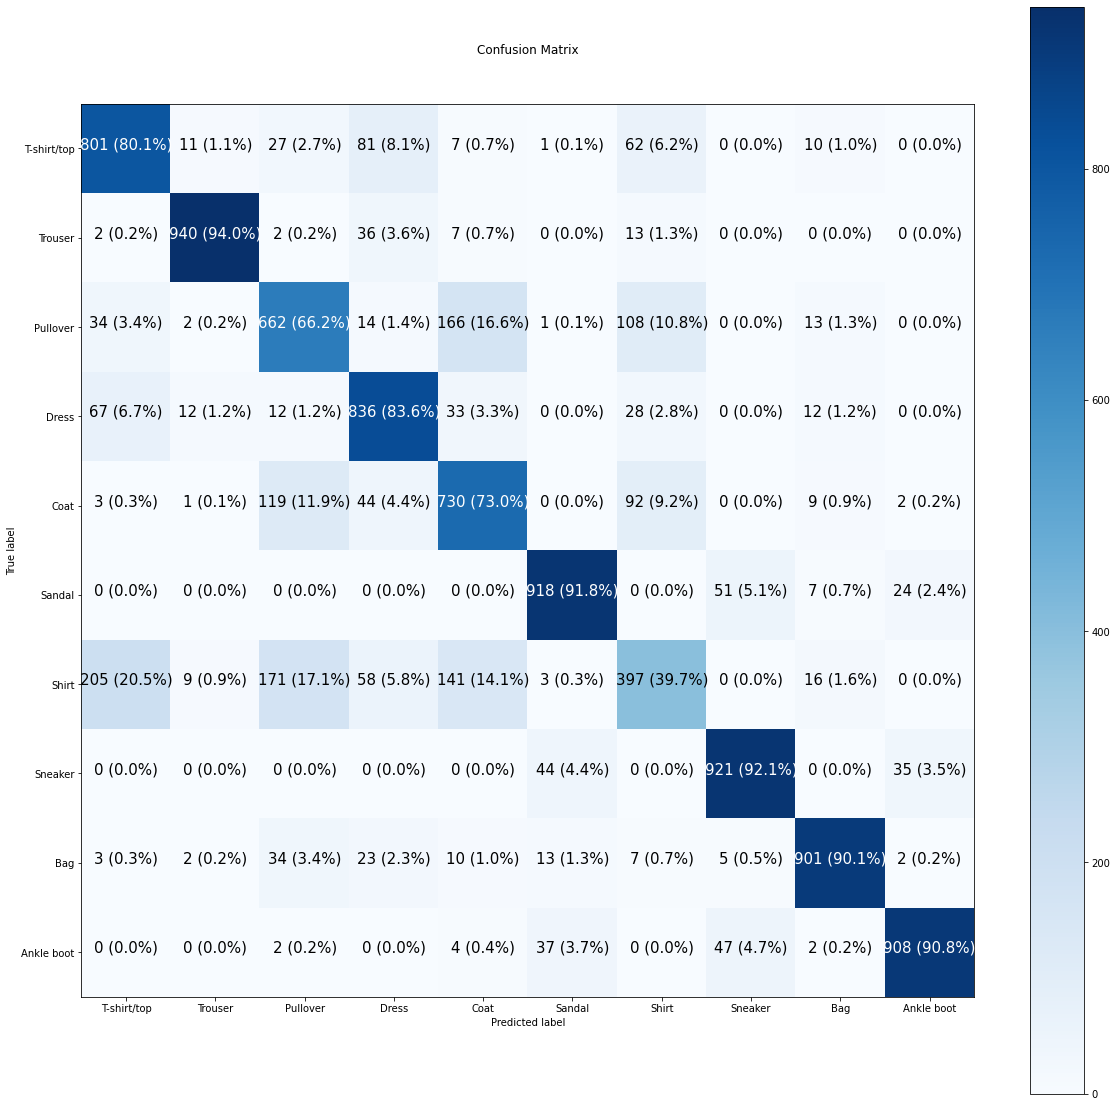

In [ ]:
make_confusion_matrix(test_labels,y_preds,classes = class_names, figsize = (20,20))

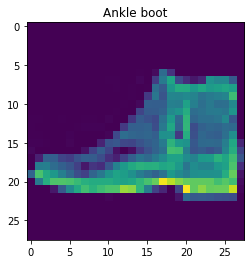

In [ ]:
def plot_random_image(test_data):
  i = np.random.randint(1,len(test_data))
  plt.imshow(test_data[i])
  plt.title(class_names[y_preds[i]])


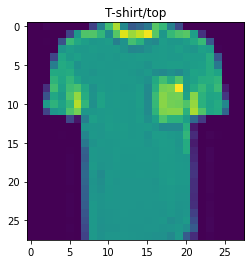

In [ ]:
plot_random_image(test_data = test_data)


In [ ]:
weights,biases = model_11_a.layers[1].get_weights()
weights

array([[ 0.38585958, -0.01683232, -0.48614585, -0.53817415],
       [ 0.09176347, -0.07343117, -0.27991334,  0.04825679],
       [ 0.43908086,  0.46483982, -0.6423494 , -0.4443902 ],
       ...,
       [-0.2540554 ,  0.5379419 , -0.15410887,  0.15027744],
       [-0.23082425,  0.45492074,  0.08331519, -0.37904847],
       [ 0.15038307,  0.13788234, -0.14806944, -0.01065999]],
      dtype=float32)

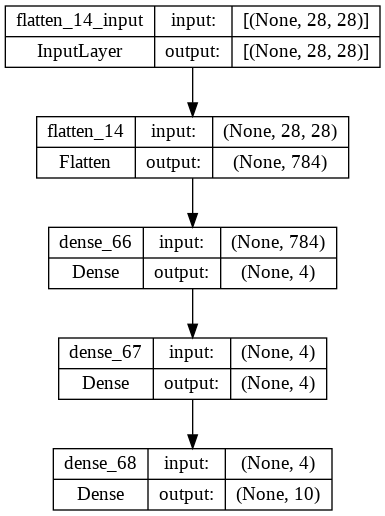

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_11_a,show_shapes = True)

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100,activation = 'tanh'),
    tf.keras.layers.Dense(100,activation = 'tanh'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
non_norm_history = model_12.fit(train_data2, train_labels,epochs = 10, validation_data = (test_data2,test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4704 - accuracy: 0.8302 - val_loss: 0.4082 - val_accuracy: 0.8509
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8664 - val_loss: 0.4401 - val_accuracy: 0.8454
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3318 - accuracy: 0.8776 - val_loss: 0.3858 - val_accuracy: 0.8612
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3083 - accuracy: 0.8862 - val_loss: 0.3593 - val_accuracy: 0.8668
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2919 - accuracy: 0.8906 - val_loss: 0.3537 - val_accuracy: 0.8721
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2763 - accuracy: 0.8961 - val_loss: 0.3611 - val_accuracy: 0.8632
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2680 - accuracy: 0.9011 - val_loss: 0.3633 - val_accuracy:

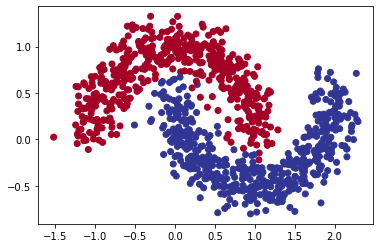

In [ ]:
import sklearn
X,Y = sklearn.datasets.make_moons(1000,noise = 0.15)
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size = 0.2)
plt.scatter(X[:,0],X[:,1],c = Y,cmap=plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)
model_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation = 'tanh'),
    tf.keras.layers.Dense(100,activation = 'tanh'),
    tf.keras.layers.Dense(100,activation = 'tanh'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10**(epoch/20))
history15 = model_15.fit(x_train, y_train,epochs = 40, validation_data = (x_test,y_test),callbacks = [lr_scheduler])

Epoch 1/40
25/25 [==============================] - 1s 11ms/step - loss: 1.7988 - accuracy: 0.6925 - val_loss: 1.0897 - val_accuracy: 0.8150 - lr: 0.0010
Epoch 2/40
25/25 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.8062 - val_loss: 0.4523 - val_accuracy: 0.8200 - lr: 0.0011
Epoch 3/40
25/25 [==============================] - 0s 5ms/step - loss: 0.3713 - accuracy: 0.8338 - val_loss: 0.3512 - val_accuracy: 0.8350 - lr: 0.0013
Epoch 4/40
25/25 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8625 - val_loss: 0.3260 - val_accuracy: 0.8600 - lr: 0.0014
Epoch 5/40
25/25 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.8850 - val_loss: 0.3194 - val_accuracy: 0.8500 - lr: 0.0016
Epoch 6/40
25/25 [==============================] - 0s 4ms/step - loss: 0.2699 - accuracy: 0.8863 - val_loss: 0.3334 - val_accuracy: 0.8400 - lr: 0.0018
Epoch 7/40
25/25 [==============================] - 0s 4ms/step - loss: 0.2725 - 

Text(0, 0.5, 'loss')

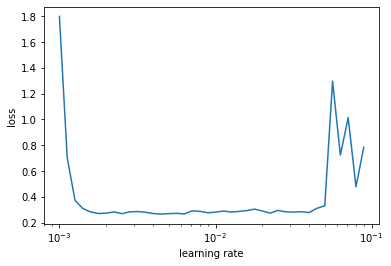

In [ ]:
lrs = 1e-3 *10**(tf.range(40)/20)
loss = history15.history['loss']
plt.semilogx(lrs,loss)
plt.xlabel('learning rate')
plt.ylabel('loss')

In [ ]:
tf.random.set_seed(42)
model_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = 'tanh'),
    tf.keras.layers.Dense(100,activation = 'tanh'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_15.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
history15 = model_15.fit(x_train, y_train,epochs = 50, validation_data = (x_test,y_test))

Epoch 1/50
25/25 [==============================] - 1s 19ms/step - loss: 0.4483 - accuracy: 0.7912 - val_loss: 0.3270 - val_accuracy: 0.8300
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2930 - accuracy: 0.8675 - val_loss: 0.3163 - val_accuracy: 0.8400
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2692 - accuracy: 0.8825 - val_loss: 0.3176 - val_accuracy: 0.8450
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.8913 - val_loss: 0.3202 - val_accuracy: 0.8450
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2615 - accuracy: 0.8863 - val_loss: 0.3288 - val_accuracy: 0.8450
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.8863 - val_loss: 0.3251 - val_accuracy: 0.8500
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.2633 - accuracy: 0.8888 - val_loss: 0.3314 - val_accuracy: 0.8450
Epoch 8/50
25/25 [=

79/79 [==============================] - 0s 2ms/step


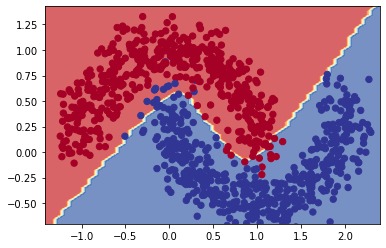

In [ ]:
plot_decision_boundary(model_15,X,Y)